In [28]:
import sys
sys.path.append("..")
import simulate_data
import posterior_inference
import pystan_util
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Simulate data.
N = 300
data = simulate_data.gen_data(
    n_C=N, n_T=N, beta=1, gamma_C=.3, gamma_T=.2, K=3,
    loc=np.array([-1, 1, 2]), scale=np.array([0.7, 1.3, 1.0]),
    nu=np.array([15, 30, 10]), phi=np.array([-2, -5, 0]),
    eta_C=np.array([.5, .5, 1e-16]),
    eta_T=np.array([.5, .4, .1]), seed=1)

In [4]:
# Generate priors
stan_data = pystan_util.create_stan_data(
    y_T=data['y_T'], y_C=data['y_C'],
    K=5, m_phi=-1, s_mu=2, s_phi=3, a_p=1, b_p=1)

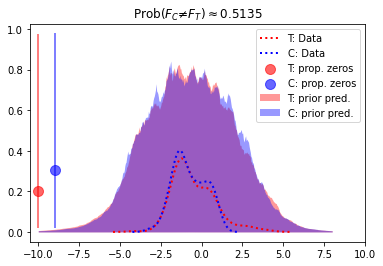

In [6]:
# Simulate from prior
y_grid = np.linspace(-10, 8, 500)
simulate_data.plot_data(yT=data['y_T'], yC=data['y_C'], bins=30)
posterior_inference.plot_prior_density(
    stan_data, y_grid, B=2000, fill_alpha=0.4, mean_alpha=0)
plt.xlim(-10.5, 10)
plt.legend(loc='upper right');

In [183]:
def rm_inf(x):
    return x[np.isfinite(x)]

def rinvgamma(a, b, size=None):
    return 1 / np.random.gamma(a, 1 / b, size)

In [196]:
def prior_sim(N):
    K = 3
    loc = np.random.normal(1, 3, K)
    scale = np.sqrt(rinvgamma(3, 2, K))
    phi = np.random.normal(-1, 3, K)
    nu = np.random.lognormal(3.5, 0.5, K)
    
    data = simulate_data.gen_data(
        n_C=N, n_T=N, beta=1, gamma_C=0, gamma_T=0, K=K,
        loc=loc, scale=scale, nu=nu, phi=phi,
        eta_C=np.array([.5, .5, 1e-16]),
        eta_T=np.array([.5, .2, .3]))
        # eta_T=np.array([.5, .4, .1]))
    
    return dict(yC=rm_inf(data['y_C']), yT=rm_inf(data['y_T']))

def prior_sims(B, N, seed=None):
    if seed is not None:
        np.random.seed(seed)
    return [prior_sim(N) for b in range(B)]

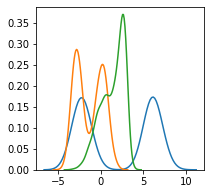

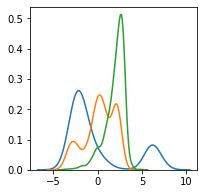

In [198]:
ps = prior_sims(3, 1000, 30)
for i in ('C', 'T'):
    plt.figure(figsize=(3, 3))
    for p in ps:
        sns.kdeplot(p[f'y{i}']);
    plt.savefig(f'prior-draws-{i}.pdf', bbox_inches='tight')
    plt.show()
    plt.close()